## Monthly Sales prediction of several items with Auto Regressive Model

## Load data

- Training data (salesdata1.txt): contains sales data for 5 items (i=1...5) over 24 months (t=1...24)
- Testing data (salestestdata.txt) : contain sales data for 5 items for months 25, 26,...,30.

In [1]:
salesdata = textread('salesdata1.txt');
salestestdata = textread('salestestdata.txt');

In [2]:
NumOfMonths = size(salesdata,2);
NumOfItems = size(salesdata,1);

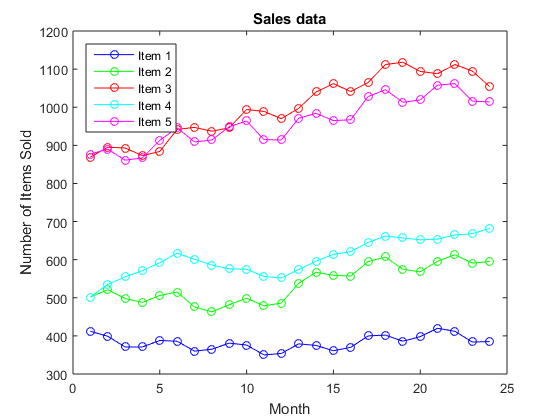

In [4]:
figure();

col = {'b-o','g-o','r-o','c-o','m-o'};

% plot of salesdata
for i = 1:NumOfItems
    plot(salesdata(i,:),col{i});
    hold on
end

hleg = legend('Item 1','Item 2','Item 3','Item 4','Item 5');
set(hleg,'Location','northwest');
xlabel('Month'), ylabel('Number of Items Sold'), title('Sales data')

## Autoregressive (AR) Model

In [7]:
D_tau = 5; % the number of steps to look back for past data
weight = zeros(NumOfItems,NumOfItems,D_tau);
A = []; % For each item, i.e. A(:,:,1) & A(:,:,2), ... matrices are same!!!
ww = zeros(D_tau*NumOfItems,1);


for it = 1:NumOfItems
    for m = D_tau+1:NumOfMonths
      pos = 1;
      for j = 1:NumOfItems
        for i = 1:D_tau
              A(m-D_tau,pos,it) =  salesdata(floor((pos-1)/D_tau)+1,m-i);
              pos = pos + 1;
        end
      end
    end
    
    ww = A(:,:,it)\salesdata(it,D_tau+1:NumOfMonths)';
    for j = 1:NumOfItems
        weight(it,j,:) = ww(D_tau*(j-1)+1:D_tau*j);
    end
end
A


A(:,:,1) =

  Columns 1 through 11

         388         371         371         399         412         506         488         498         521         502         884
         386         388         371         371         399         515         506         488         498         521         942
         360         386         388         371         371         476         515         506         488         498         947
         365         360         386         388         371         463         476         515         506         488         937
         381         365         360         386         388         482         463         476         515         506         946
         376         381         365         360         386         499         482         463         476         515         994
         350         376         381         365         360         479         499         482         463         476         989
         354         350        

In [8]:
%% prediction for next month only
NumOfPredictedMonths = 1;
predictedSales = zeros(NumOfItems,NumOfPredictedMonths);   % for next month only
predA = [];
tempMatrix = zeros(NumOfItems,D_tau);
for it=1:NumOfItems
    for m = NumOfMonths+1:NumOfMonths+NumOfPredictedMonths
        for pos = 1:D_tau*NumOfItems
            predA(it,pos) = salesdata(floor((pos-1)/D_tau)+1,m-D_tau+mod(pos+1,D_tau));
        end
    end
    tempMatrix0 = weight(it,:,:);
  
    for tt = 1:size(tempMatrix0,2)
        tempMatrix1 = tempMatrix0(1,tt,:);
        for tau = 1:size(tempMatrix1,3)
            tempMatrix(tt,tau) = tempMatrix1(:,:,tau);
        end
    end
    %tempMatrix = tempMatrix';
        
    predictedSales(it,1) = predA(it,:)*reshape(tempMatrix',D_tau*NumOfItems,1);
end

predictedSales



predictedSales =

   1.0e+03 *

    0.4476
    0.6923
    1.2330
    0.7708
    1.2086




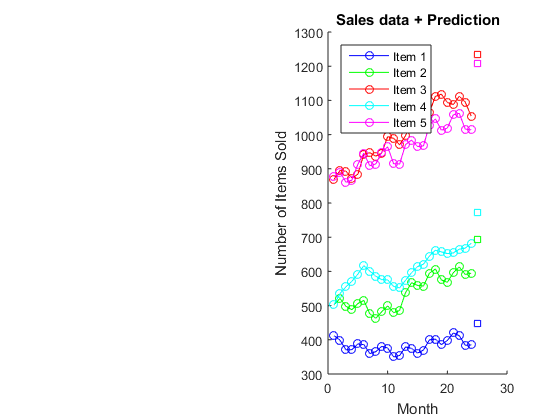

In [11]:
%% plot of sales data + predictedsalesdata
t = (1:NumOfMonths)';       % months

subplot(122)
colQR = {'bs','gs','rs','cs','ms'};

hold on
for i = 1:NumOfItems
    plot(t,salesdata(i,:),col{i});
end

hleg = legend('Item 1','Item 2','Item 3','Item 4','Item 5');
set(hleg,'Location','northwest');
xlabel('Month'), ylabel('Number of Items Sold'), title('Sales data + Prediction')

for i = 1:NumOfItems
        plot((NumOfMonths+1:NumOfMonths+NumOfPredictedMonths),predictedSales(i,1),colQR{i})
end

In [10]:
error = zeros(NumOfItems+1,1);      % last row is sum
for i=1:NumOfItems
    error(i,1) = norm(salestestdata(i,:)-predictedSales(i,1));
end
error(NumOfItems+1,:) = sum(error(1:NumOfItems,:),1);
disp('Errors (Euclidean norm)')
error     

Errors (Euclidean norm)

error =

   1.0e+03 *

    0.1275
    0.2540
    0.3454
    0.2652
    0.4396
    1.4317


